In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from datetime import date

In [2]:
df = pd.read_csv("data.csv")
print(df.shape)

(18207, 89)


In [3]:
df.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 89 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                18207 non-null  int64  
 1   ID                        18207 non-null  int64  
 2   Name                      18207 non-null  object 
 3   Age                       18207 non-null  int64  
 4   Photo                     18207 non-null  object 
 5   Nationality               18207 non-null  object 
 6   Flag                      18207 non-null  object 
 7   Overall                   18207 non-null  int64  
 8   Potential                 18207 non-null  int64  
 9   Club                      17966 non-null  object 
 10  Club Logo                 18207 non-null  object 
 11  Value                     18207 non-null  object 
 12  Wage                      18207 non-null  object 
 13  Special                   18207 non-null  int64  
 14  Prefer

In [5]:
df.isna().sum()

Unnamed: 0           0
ID                   0
Name                 0
Age                  0
Photo                0
                  ... 
GKHandling          48
GKKicking           48
GKPositioning       48
GKReflexes          48
Release Clause    1564
Length: 89, dtype: int64

Do the analysis for at least one categorical variable and at least one numerical variable. Show appropriate plots for your data. Describe the result of your analysis.

In [6]:
numerical = [
  'Age','Weak Foot','Skill Moves'
]
categorical = [
  'Preferred Foot','Work Rate'
]

d = df[numerical + categorical]
d.shape

(18207, 5)

C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Age of football players')

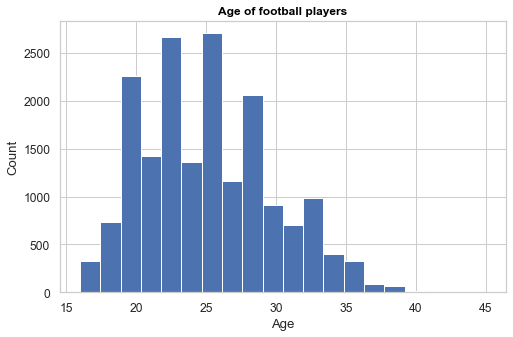

In [22]:
#numerical
sns.set(style='whitegrid', palette="deep", font_scale=1.1, rc={"figure.figsize": [8, 5]})
sns.distplot(
    df['Age'], norm_hist=False, kde=False, bins=20, hist_kws={"alpha": 1}
).set(xlabel='Age', ylabel='Count')
plt.title("Age of football players", color="black",fontsize=12,fontweight="bold", horizontalalignment="center")

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


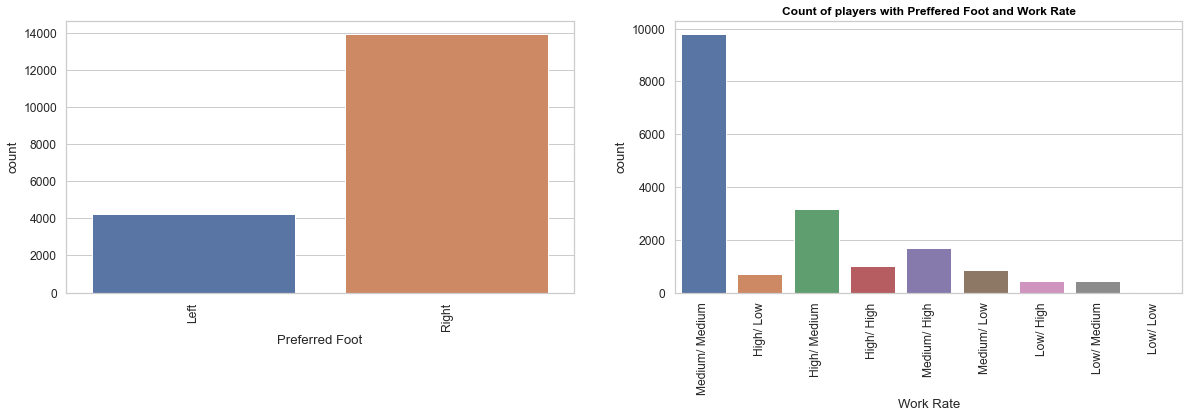

In [25]:
#categorical

fig, ax = plt.subplots(1, 2, figsize=(20, 5))
plt.title("Count of players with Preffered Foot and Work Rate", color="black",fontsize=12,fontweight="bold", horizontalalignment="center")
for variable, subplot in zip(categorical, ax.flatten()):
    sns.countplot(df[variable], ax=subplot)
    for label in subplot.get_xticklabels():
        label.set_rotation(90)
        plt.xticks(rotation='vertical')
       

Do the analysis for at least one set of two or more variables. Show appropriate plots for your data. Describe the result of your analysis.

In [9]:
df['Nationality'].value_counts()[:3]

England    1662
Germany    1198
Spain      1072
Name: Nationality, dtype: int64

In [10]:
England=df[df['Nationality']=='England'][:7]
Germany=df[df['Nationality']=='Germany'][:7]
Spain=df[df['Nationality']=='Spain'][:7]


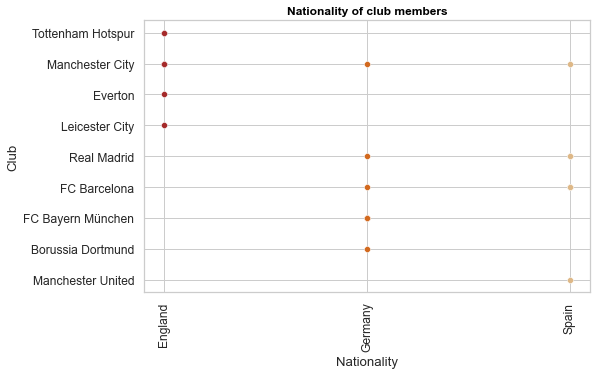

In [26]:
sns.scatterplot(x="Nationality",y="Club", data=England, color='#A52A2A')
sns.scatterplot(x="Nationality",y="Club", data=Germany, color='#D2691E')
sns.scatterplot(x="Nationality",y="Club", data=Spain, color='#DEB887')


plt.xticks(rotation='vertical')
plt.title("Nationality of club members", color="black",fontsize=12,fontweight="bold", horizontalalignment="center")
plt.rcParams['figure.figsize'] = [10,8]
plt.show()

Pick the variable (column) with date/datetime values and show the appropriate plot for your data. Describe the result of your analysis

In [12]:
df['Joined'] = pd.to_datetime(df['Joined'])
df['joined_year']=df['Joined'].dt.year
df.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause,joined_year
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M,2004.0
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M,2018.0
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M,2017.0
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M,2011.0
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M,2015.0


Text(0.5, 0, 'Joined Year')

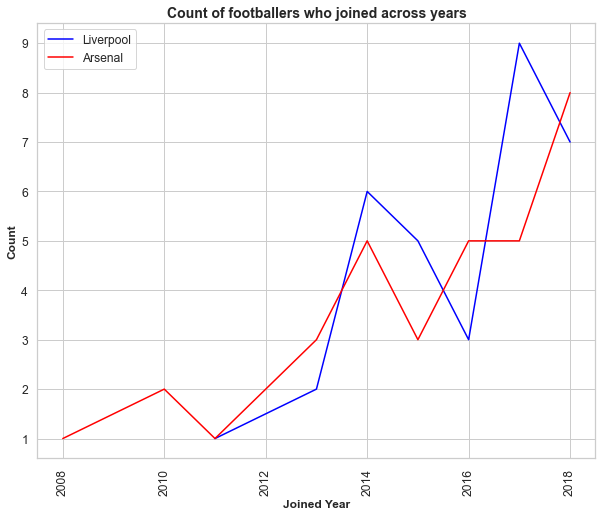

In [13]:
liverpool=df[df['Club']=='Liverpool']
arsenal=df[df['Club']=='Arsenal']

plt.title('Count of footballers who joined across years', fontsize=14, fontweight='bold')
sns.lineplot(x=liverpool['joined_year'].value_counts().index, y=liverpool['joined_year'].value_counts().values, color='blue')
sns.lineplot(x=arsenal['joined_year'].value_counts().index, y=arsenal['joined_year'].value_counts().values, color='red')
plt.legend(['Liverpool', 'Arsenal'])
plt.rcParams['figure.figsize'] = [10,5]
plt.xticks(rotation='vertical')
plt.ylabel('Count', fontsize=12, fontweight='bold')
plt.xlabel('Joined Year', fontsize=12, fontweight='bold')


Pick the variable (column) to perform the groupby and apply filtration on the data. Describe the result of your analysis

In [14]:
df["Age"].mean()

25.122205745043114

In [15]:
avg=df.groupby(['Age']).filter(lambda x: len(x) > df['Age'].mean())
avg

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause,joined_year
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M,2004.0
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M,2018.0
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M,2017.0
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M,2011.0
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M,2015.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18202,18202,238813,J. Lundstram,19,https://cdn.sofifa.org/players/4/19/238813.png,England,https://cdn.sofifa.org/flags/14.png,47,65,Crewe Alexandra,...,40.0,48.0,47.0,10.0,13.0,7.0,8.0,9.0,€143K,2017.0
18203,18203,243165,N. Christoffersson,19,https://cdn.sofifa.org/players/4/19/243165.png,Sweden,https://cdn.sofifa.org/flags/46.png,47,63,Trelleborgs FF,...,22.0,15.0,19.0,10.0,9.0,9.0,5.0,12.0,€113K,2018.0
18204,18204,241638,B. Worman,16,https://cdn.sofifa.org/players/4/19/241638.png,England,https://cdn.sofifa.org/flags/14.png,47,67,Cambridge United,...,32.0,13.0,11.0,6.0,5.0,10.0,6.0,13.0,€165K,2017.0
18205,18205,246268,D. Walker-Rice,17,https://cdn.sofifa.org/players/4/19/246268.png,England,https://cdn.sofifa.org/flags/14.png,47,66,Tranmere Rovers,...,20.0,25.0,27.0,14.0,6.0,14.0,8.0,9.0,€143K,2018.0


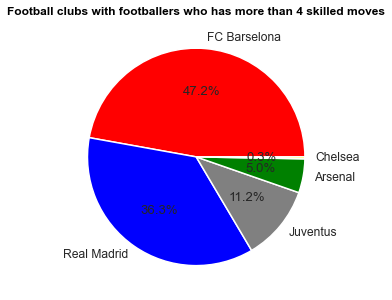

In [16]:
x = df['Skill Moves'].value_counts()
labels=['FC Barselona','Real Madrid','Juventus','Arsenal','Chelsea']
fig, ax = plt.subplots()
ax.pie(x, labels = labels, autopct='%1.1f%%', wedgeprops = { 'linewidth' : 1.5, 'edgecolor' : 'white' },colors=['red','blue','gray','green','yellow'])
plt.rcParams['figure.figsize'] = [10,6]
plt.title('Football clubs with footballers who has more than 4 skilled moves', color="black",fontsize=12,fontweight="bold", horizontalalignment="center")
plt.show()


Implement any feature(s) of your own choice that is/are not mentioned in the specification

In [17]:
Soccers=df[df['Club']=='Real Madrid'][:7]
Soccers

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause,joined_year
6,6,177003,L. Modrić,32,https://cdn.sofifa.org/players/4/19/177003.png,Croatia,https://cdn.sofifa.org/flags/10.png,91,91,Real Madrid,...,60.0,76.0,73.0,13.0,9.0,7.0,14.0,9.0,€137.4M,2012.0
8,8,155862,Sergio Ramos,32,https://cdn.sofifa.org/players/4/19/155862.png,Spain,https://cdn.sofifa.org/flags/45.png,91,91,Real Madrid,...,87.0,92.0,91.0,11.0,8.0,9.0,7.0,11.0,€104.6M,2005.0
11,11,182521,T. Kroos,28,https://cdn.sofifa.org/players/4/19/182521.png,Germany,https://cdn.sofifa.org/flags/21.png,90,90,Real Madrid,...,72.0,79.0,69.0,10.0,11.0,13.0,7.0,10.0,€156.8M,2014.0
19,19,192119,T. Courtois,26,https://cdn.sofifa.org/players/4/19/192119.png,Belgium,https://cdn.sofifa.org/flags/7.png,89,90,Real Madrid,...,20.0,18.0,16.0,85.0,91.0,72.0,86.0,88.0,€113.7M,2018.0
27,27,200145,Casemiro,26,https://cdn.sofifa.org/players/4/19/200145.png,Brazil,https://cdn.sofifa.org/flags/54.png,88,90,Real Madrid,...,88.0,90.0,87.0,13.0,14.0,16.0,12.0,12.0,€126.4M,2013.0
30,30,197781,Isco,26,https://cdn.sofifa.org/players/4/19/197781.png,Spain,https://cdn.sofifa.org/flags/45.png,88,91,Real Madrid,...,60.0,64.0,51.0,10.0,8.0,12.0,15.0,6.0,€156.2M,2013.0
35,35,176676,Marcelo,30,https://cdn.sofifa.org/players/4/19/176676.png,Brazil,https://cdn.sofifa.org/flags/54.png,88,88,Real Madrid,...,71.0,85.0,86.0,12.0,5.0,5.0,5.0,9.0,€88.2M,2007.0


In [18]:
l = df[df['Preferred Foot']=='Left']
r = df[df['Preferred Foot']=='Right']

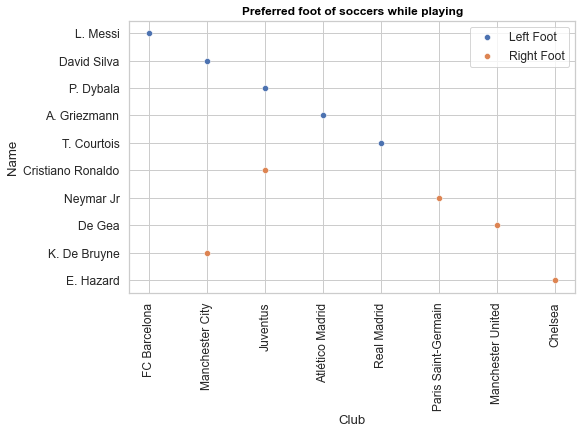

In [21]:
sns.scatterplot(y=l["Name"][:5],x=l["Club"][:5],palette="winter",data=l)
sns.scatterplot(y=r["Name"][:5],x=r["Club"][:5],palette="winter",data=r)
plt.title("Preferred foot of soccers while playing", color="black",fontsize=12,fontweight="bold", horizontalalignment="center")
plt.legend(['Left Foot', 'Right Foot'])
plt.rcParams['figure.figsize'] = [8,5]
plt.xticks(rotation='vertical')
plt.show()